In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [7]:
# 데이터 불러오기 
df = pd.read_csv("../dataset/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [9]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [11]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


Text(0.5, 1.0, 'Label')

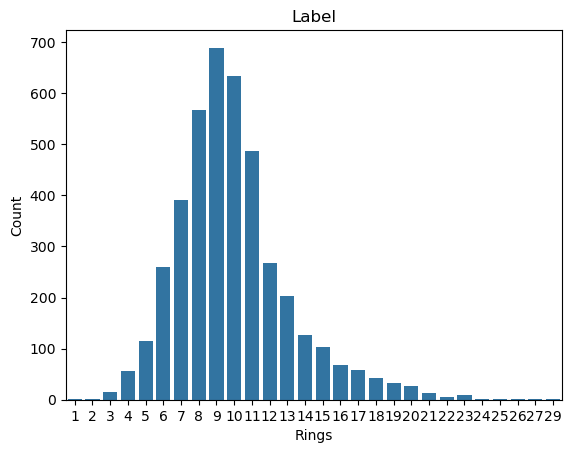

In [13]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [15]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

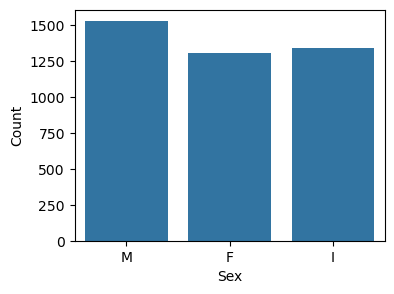

In [31]:
plt.figure(figsize=(4,3 ))
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

In [33]:
# Sex Feature에 label Encoding 적용 
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체 생성
le = LabelEncoder()
# 'Gender' 컬럼에 Label Encoding 적용
df['Sex'] = le.fit_transform(df['Sex'])

print(df)

      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                  
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                         
0             

Text(0, 0.5, 'Count')

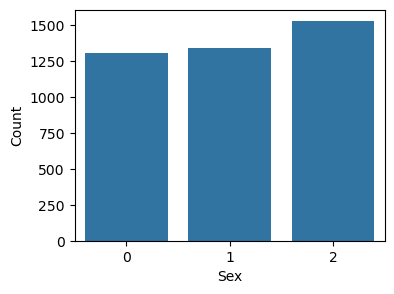

In [35]:
plt.figure(figsize=(4,3 ))
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

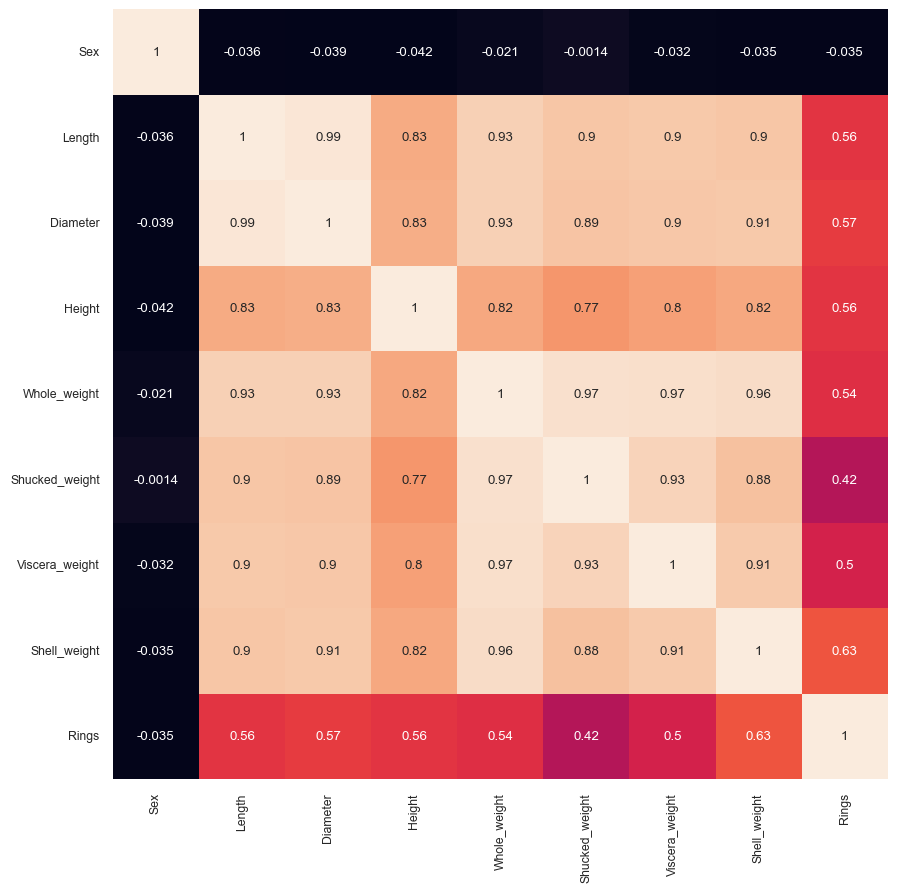

In [37]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

### -> Ring랑 상관관계 높은거 : Shell_weight > Diameter .... (sex는 상관관계가 아주 없음. 삭제해도될듯)

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>],
       [<Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

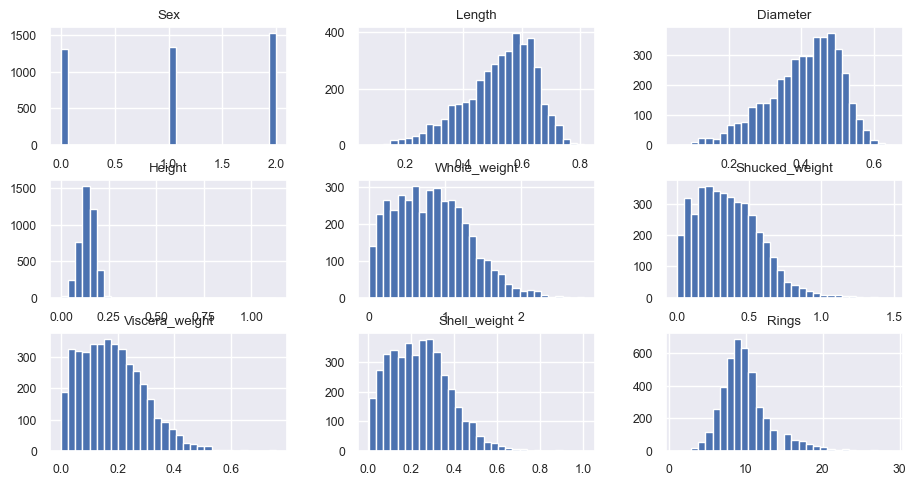

In [56]:
df.hist(bins=30,figsize=(11,5.5))

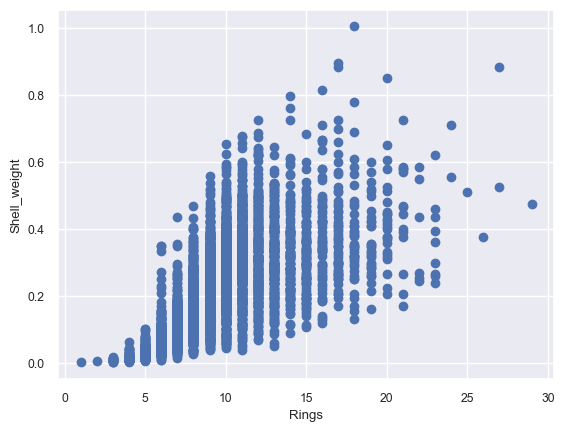

In [58]:
# 산점도 확인 (둘의 관계)

plt.scatter(df['Rings'], df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

plt.show()

In [60]:
(df == 0).sum()

Sex               1307
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64

In [72]:
df = df[(df['Height'] != 0)] # 결측치 제거 (2)

In [74]:
# 'Sex' 열 삭제
df = df.drop('Sex', axis=1)

In [76]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [78]:
y = df['Rings']
X = df.drop('Rings',axis=1)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2672, 7), (835, 7), (2672,), (835,), (668, 7), (668,))

In [84]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

In [88]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(7,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,155 (12.32 KB)

 Trainable params: 3,155 (12.32 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
N_Epochs = 50
history = model.fit(train_scaled, y_train, epochs=N_Epochs, batch_size=16, validation_data=(val_scaled, y_val), verbose=True, shuffle=True)

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 78.8102 - mse: 78.8102 - val_loss: 9.1274 - val_mse: 9.1274
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 10.3971 - mse: 10.3971 - val_loss: 6.7584 - val_mse: 6.7584
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 6.0777 - mse: 6.0777 - val_loss: 6.6266 - val_mse: 6.6266
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 5.5180 - mse: 5.5180 - val_loss: 5.7022 - val_mse: 5.7022
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 5.0643 - mse: 5.0643 - val_loss: 5.3224 - val_mse: 5.3224
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 5.0710 - mse: 5.0710 - val_loss: 5.1687 - val_mse: 5.1687
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 5.1772 - mse: 5.1772 - val_loss: 5.0881 - val_mse: 5.0881
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 4.5796 - mse: 4.5796 - val_loss: 5.0472 - val_mse: 5.0472
Epoch 9/50
167/167 ━━━━━━━━━━━━━━━━━━━

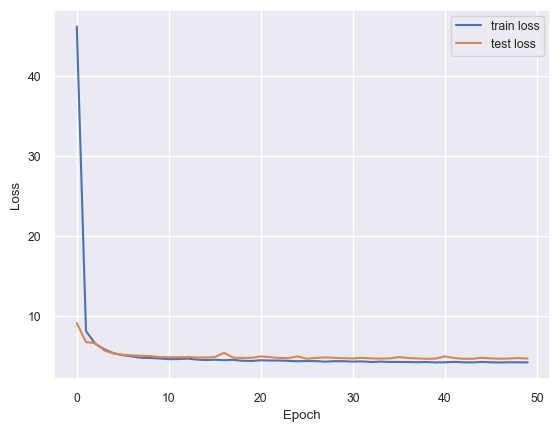

In [92]:
plt.plot(range(50), history.history['loss'], label='train loss')
plt.plot(range(50), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
model.evaluate(test_scaled, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 4.0538 - mse: 4.0538


[4.312264919281006, 4.312264919281006]